In [7]:
#model analysis notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE


In [ ]:
#load 1850 model
model = Word2Vec.load("models/1850s/word2vec_1850s.model")

In [24]:
#can this model solve gender analogies?
result = model.wv.most_similar(positive=['brother', 'woman'], negative=['man'], topn=3)

for word, similarity in result:
    print(f"{word}: {similarity:.3f}")

sister: 0.600
inlaw: 0.536
mother: 0.500


In [23]:
#can this model solve geography analogies?
result = model.wv.most_similar(positive=['france', 'berlin'], negative=['paris'], topn=3)

for word, similarity in result:
    print(f"{word}: {similarity:.3f}")

prussia: 0.614
germany: 0.556
russia: 0.523


In [51]:
# check for 10 most similar words to "utopia"
similar_words_1850 = model.wv.most_similar("near", topn=30)
print("1850s - Most similar words to 'utopia':")
for word, similarity in similar_words_1850:
    print(f"{word}: {similarity:.4f}")

1850s - Most similar words to 'utopia':
ncar: 0.6893
inear: 0.6675
uear: 0.6491
nearthe: 0.6323
noar: 0.6218
unear: 0.5691
nealr: 0.5606
lafayetteplace: 0.5596
npar: 0.5455
nea: 0.5430
anear: 0.5421
madleon: 0.5414
lbetween: 0.5409
kalh: 0.5394
mlyrtle: 0.5377
madisonav: 0.5282
ahingdon: 0.5280
lexiogton: 0.5256
botween: 0.5251
mulberrv: 0.5242
nextto: 0.5232
mvrtle: 0.5231
westside: 0.5224
hobok: 0.5207
aladison: 0.5196
rivinglon: 0.5195
colmer: 0.5190
marketst: 0.5189
hleights: 0.5175
iyrtle: 0.5174


In [ ]:
# check for 10 most similar words to "utopia"
similar_words_1850 = model.wv.most_similar("utopia", topn=10)
print("1850s - Most similar words to 'utopia':")
for word, similarity in similar_words_1850:
    print(f"{word}: {similarity:.4f}")


1850s - Most similar words to 'utopia':
monarchial: 0.7627
dismember: 0.7499
subordinated: 0.7497
incarnated: 0.7446
outgrowth: 0.7429
sensuous: 0.7384
democracies: 0.7371
impractical: 0.7352
idiosyncracies: 0.7336
discerns: 0.7323


In [ ]:
# check for 10 most similar words to "utopian"
similar_words_1850 = model.wv.most_similar("utopian", topn=10)
print("1850s - Most similar words to 'utopian':")
for word, similarity in similar_words_1850:
    print(f"{word}: {similarity:.4f}")

1850s - Most similar words to 'utopian':
preconceived: 0.7174
visionary: 0.7158
innovators: 0.7156
obscurely: 0.7147
chimerical: 0.7116
shortsighted: 0.7110
vagary: 0.7108
paradoxical: 0.7084
uncandid: 0.7080
subjective: 0.7067


In [31]:
#function that takes in a word and a model, and returns a dataframe of the 10 most similar words and their similarity scores
def get_similar_words_df(model, word, topn=10):
    similar_words = model.wv.most_similar(word, topn=topn)
    df = pd.DataFrame(similar_words, columns=['word', 'similarity'])
    return df

In [47]:
get_similar_words_df(model, 'visionaries')

,word,similarity
0,impiously,0.800713
1,blockheads,0.790684
2,compliances,0.786786
3,gullibility,0.785682
4,communism,0.784439
5,disgusts,0.783296
6,irreligious,0.779220
7,extravagancies,0.778445
8,unenlightened,0.778133
9,uncharitableness,0.776329


In [28]:
#function that takes a word and a model as input and returns a TSNE plot of the word and its 15 nearest neighbors
def plot_word_neighbors(word, model):
    neighbors = model.wv.most_similar(word, topn=15)
    words_to_plot = [word] + [n for n, _ in neighbors]

    vectors = np.array([model.wv[w] for w in words_to_plot])

    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    vectors_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(8,6))
    for i, w in enumerate(words_to_plot):
        x, y = vectors_2d[i]
        if w == word:
            plt.scatter(x, y, color='red', s=150, marker='*')
            plt.text(x+0.01, y+0.01, w, fontsize=14, fontweight='bold', color='red')
        else:
            plt.scatter(x, y, color='blue', s=80)
            plt.text(x+0.01, y+0.01, w, fontsize=12)

    plt.title(f"2D visualization of '{word}' and its neighbors", fontsize=16)
    plt.show()

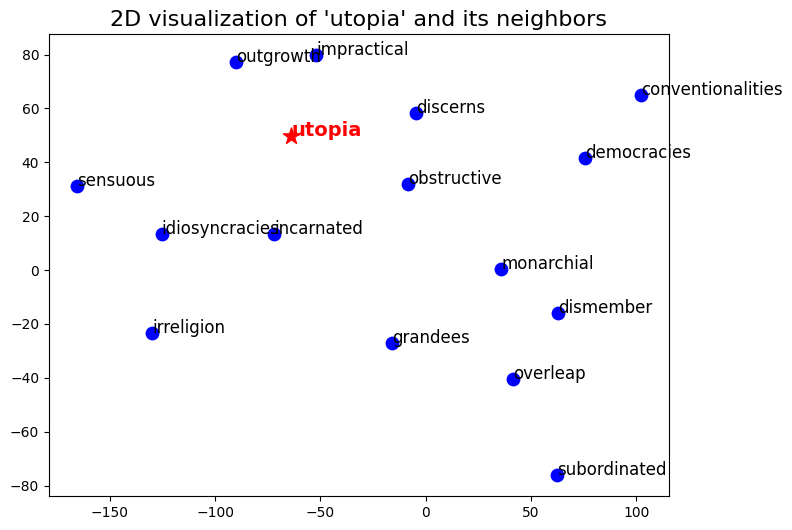

In [29]:
plot_word_neighbors("utopia", model)

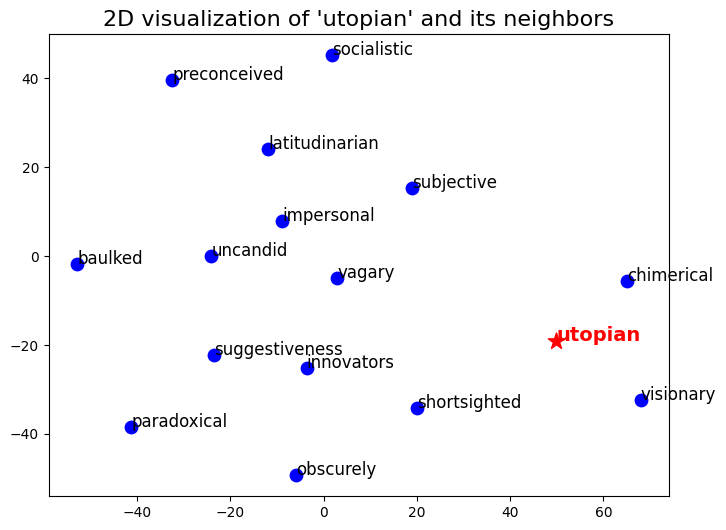

In [30]:
plot_word_neighbors("utopian", model)